In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
plt.rcParams.update({'font.size':10}) # set global font size
     

# Корреляция и косинусное сходство

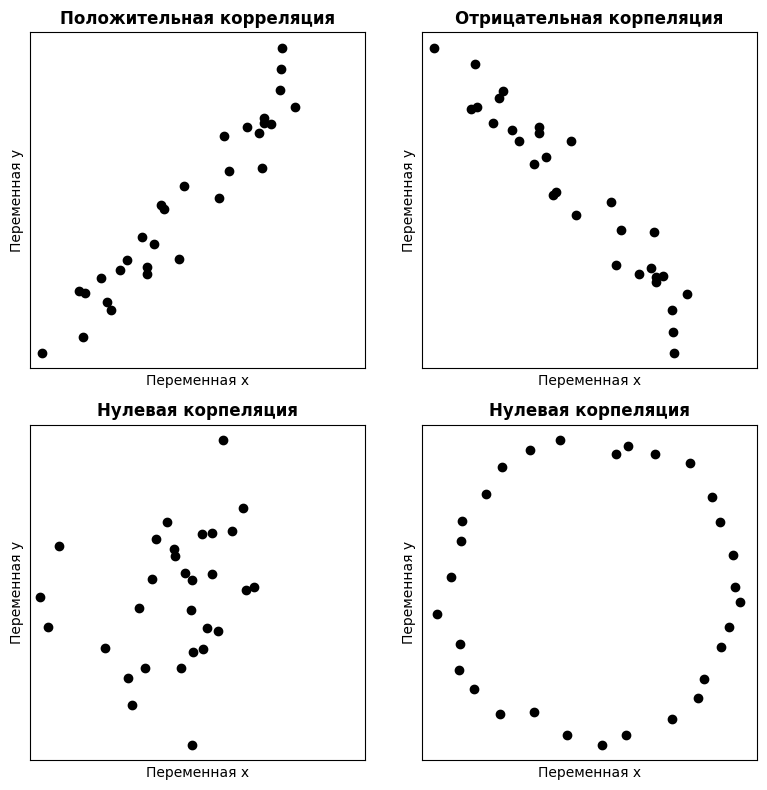

In [2]:
# Визуализируем графики с различной корреляцией у переменных

N = 30 # количество точек на каждом графике

#Зададим точки с "хорошей" корреляцией
x = np.linspace(0,10, N) + np.random.randn(N)
y = x + np.random.randn(N)

# Создадим основу для графиков (4 подграфика)
_, axs = plt.subplots(2, 2, figsize=(8, 8))

# Добавим на график положительной корреляции
axs[0,0].plot(x, y, "ko")
axs[0,0].set_title("Положительная корреляция", fontweight="bold")
axs[0,0].set_xlabel("Переменная x")
axs[0,0].set_ylabel("Переменная y")
axs[0,0].set_xticks([])
axs[0,0].set_yticks([])
axs[0,0].axis("square")

# График отрицательной корреляции
axs[0,1].plot(x, -y, "ko")
axs[0,1].set_title("Отрицательная корпеляция", fontweight="bold")
axs[0,1].set_xlabel("Переменная x")
axs[0,1].set_ylabel("Переменная y")
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])
axs[0,1].axis("square")

# График нулевой корреляции (1)
axs[1,0].plot(np.random.randn(N), np.random.randn(N), "ko")
axs[1,0].set_title("Нулевая корпеляция", fontweight="bold")
axs[1,0].set_xlabel("Переменная x")
axs[1,0].set_ylabel("Переменная y")
axs[1,0].set_xticks([])
axs[1,0].set_yticks([])
axs[1,0].axis("square")

# график нулевой корреляции (2)
x = np.cos(np.linspace(0, 2*np.pi, N)) + np.random.randn(N)/20
y = np.sin(np.linspace(0, 2*np.pi, N)) + np.random.randn(N)/20
axs[1,1].plot(x, y, "ko")
axs[1,1].set_title("Нулевая корпеляция", fontweight="bold")
axs[1,1].set_xlabel("Переменная x")
axs[1,1].set_ylabel("Переменная y")
axs[1,1].set_xticks([])
axs[1,1].set_yticks([])
axs[1,1].axis("square")

plt.tight_layout()
plt.show()

# Кластеризация методом $k$-средних

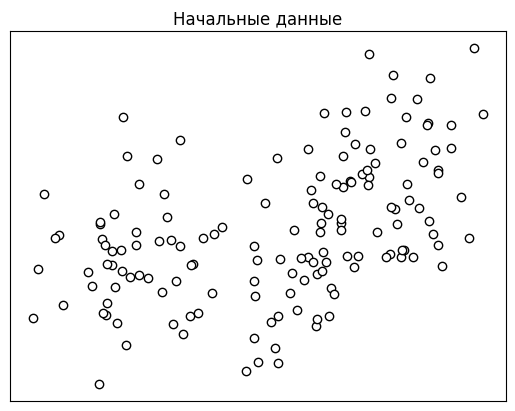

In [3]:
# Сгенерируем данные. Будет выборка из 150 различных измерений для 2 признаков
# каждый кластер состоит из 50 измерений. 
nPerClust = 50

# "Размытие" вокруг каждого кластера (Площадь кластера)
blur = 1

# Зададим цетр каждого из них
A = [1, 1]
B = [-3, 1]
C = [3, 3]

# Зададим наборы точек для каждого кластера
a = np.array( [A[0] + np.random.randn(nPerClust) * blur, A[1] + np.random.randn(nPerClust) * blur] )
b = np.array([ B[0] + np.random.randn(nPerClust) * blur, B[1] + np.random.randn(nPerClust) * blur ])
c = np.array([ C[0] + np.random.randn(nPerClust) * blur, C[1] + np.random.randn(nPerClust) * blur ])

# Далее объединим три кластера в один
abc = np.concatenate((a, b, c), axis=1)
data = np.transpose(abc)

# Отрисуем данные
plt.plot(data[:, 0], data[:, 1], "ko", markerfacecolor='w')
plt.title("Начальные данные")
plt.xticks([])
plt.yticks([])

plt.show()

array([[ 1.21909546,  1.14155609],
       [-2.78824306,  1.07708201],
       [ 3.12983666,  3.08995115]])

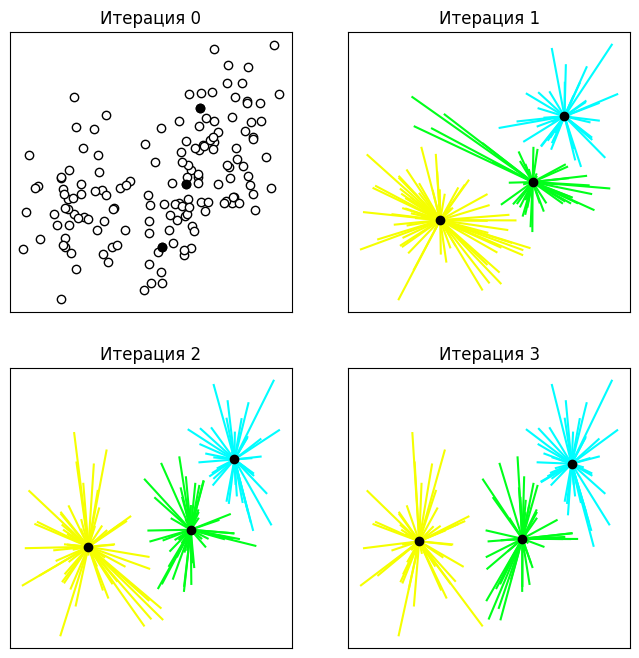

In [4]:
# кластеризация состоит из 4 шагов
# 1 шаг. Инициализирвать k (в нашем случае k=3) центроидов, которые будут соответствовать центрам кластеров
k = 3
choi = np.random.choice(range(len(data)), k, replace=False)
centroids = data[choi, :]

# Создадим заготовку для графика
_, axs = plt.subplots(2, 2, figsize=(8, 8))
axs = axs.flatten()
color = [[0, 1, .1], [.96, 1, 0], [0, .992, 1]]

# Нарисуем начальные данные и выделим рандомные центроиды
axs[0].plot(data[:, 0], data[:, 1], "ko", markerfacecolor="w")
axs[0].plot(centroids[:,0], centroids[:,1], "ko")
axs[0].set_title("Итерация 0")
axs[0].set_xticks([])
axs[0].set_yticks([])

# Сделаем цикл по итерациям
for iter in range(3):
    # Шаг 2. Вычислить евклидово расстояние между каждым наблюдением и каждым центроидом
    # Создадим массив, в котором будем хранить расстояния
    dists = np.zeros((data.shape[0], k))
    
    # Далее с помощью цикла и транслировании векторов вычислим массив расстояний
    for ci in range(k):
        dists[:, ci] = np.sum((data-centroids[ci, :]) ** 2, axis=1)
    # Можно заметить, что мы вычислили не расстояние, а расстояние в квадрате. Однако этот факт не скажется на правильности наших расссчетов, так как
    # расстояние минимально там, где минимален квадрат расстояние (корень - монотонная функция)
    
    # Шаг 3. Отнести каждое наблюдение к группе с ближайшим центроидом
    # Для этого используем функцию np.argmin(), которая возращает индекс минимального значения
    groupidx = np.argmin(dists, axis=1)
    
    # Шаг 4. Обновим центроиды как среднее значение всех наблюдений данных, назначенных этому центроиду
    for ki in range(k):
        centroids[ki, :] = [np.mean(data[groupidx==ki, 0]),
                           np.mean(data[groupidx==ki, 1])]

    # Отрисуем графики
    for i in range(len(data)):
        axs[iter + 1].plot([data[i, 0], centroids[groupidx[i], 0]], [data[i, 1], centroids[groupidx[i], 1]], color = color[groupidx[i]])
    axs[iter + 1].plot(centroids[:, 0], centroids[:, 1], "ko")
    axs[iter + 1].set_xticks([])
    axs[iter + 1].set_yticks([])
    axs[iter + 1].set_title(f'Итерация {iter + 1}')
centroids

# Упражение по программированию

## Упражнения по корреляции

### Упражнение 1. Реализовать функцию, которая принимает 2 вектора и выводит коэффициент корреляции Пирсона и значение косинусного сходства

In [4]:
# Функция
def corrAndCosine(v, u):
    # Сначала косинусное сходство
    num = np.dot(v, u) # Числитель (Numerator)
    den = np.sqrt(np.dot(v, v) * np.dot(u, u)) # Занменатель (Denominator)
    cosin = num / den
    # Далее рассмотрим корреляцию Пирсона (все аналогично, но сначала центрируем)
    vm = v - np.mean(v)
    um = u - np.mean(u)
    num_2 = np.dot(vm, um)
    den_2 = np.linalg.norm(vm) * np.linalg.norm(um)
    corr = num_2 / den_2

    return corr, cosin

# Протестируем функцию
a = np.random.randn(15)
b = np.random.randn(15)

p, c = corrAndCosine(a, b)

# Сравним значение корреляции с np.corrcoef()
print(p, np.corrcoef(a,b)[0,1])

# Сравним значене косинусного сходства с функцией  sp.spatial.distance.cosine
print(c, -sp.spatial.distance.cosine(a,b) + 1) # такая запись через библиотеку Scipy из-за того, что в данной функции возращается значение 1 - cos(a,b)

0.2668403366040947 0.2668403366040947
0.3778671210297751 0.37786712102977504


In [5]:
# Посмотрим, как связаны корреляция и косинусное сходство при центрированных переменных и нецентрированных
# a и b без центрирования
a = np.random.randn(15) +10 # Обращаем внимае на смещение, чтобы центрирование имело смысл!!!
b = np.random.randn(15)

# aMean и bMean с центрированием
aMean = a - np.mean(a)
bMean = b - np.mean(b)

# Проверим результаты
print("Без центрирования (значения должны отличаться):")
print(np.round(corrAndCosine(a, b), 6))
print("")

print("С центрированием (значения должны совпадать:")
print(np.round(corrAndCosine(aMean, bMean),6))

# np.round() использовал для округления значений, чтобы проще было сравнить

Без центрирования (значения должны отличаться):
[-0.162414  0.022717]

С центрированием (значения должны совпадать:
[-0.162414 -0.162414]


### Упражнение 2. Проверить как смещение влияет на корреляцию и косинусное сходство

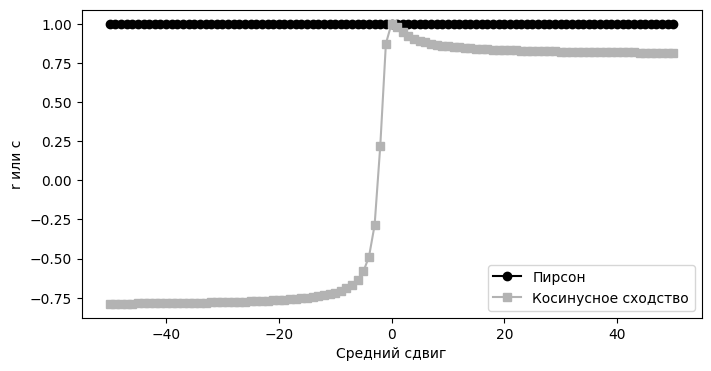

In [6]:
# Создадим переменную и список смещений
a = np.arange(0, 4, dtype = "float")
offset = np.arange(-50, 51)

results = np.zeros((len(offset), 2))
# С помощью цикла for вычислим корреляцию и косинусное сходство и сохраним в список
for i in range(len(offset)):
    results[i, :] = corrAndCosine(a, a + offset[i])

# Визуализируем результат
plt.figure(figsize=(8,4))
h = plt.plot(offset, results)
h[0].set_color("k")
h[0].set_marker("o")
h[1].set_color([.7,.7,.7])
h[1].set_marker("s")

plt.xlabel("Средний сдвиг")
plt.ylabel("r или c")
plt.legend(["Пирсон", "Косинусное сходство"])
plt.show()

### Упраженние 3. Посмотреть, как реализована корреляция Пирсона в функции sp.stats.paersnr()

In [7]:
??sp.stats.pearsonr

Signature: sp.stats.pearsonr(x, y, *, alternative='two-sided', method=None)
Source:   
def pearsonr(x, y, *, alternative='two-sided', method=None):
    r"""
    Pearson correlation coefficient and p-value for testing non-correlation.

    The Pearson correlation coefficient [1]_ measures the linear relationship
    between two datasets. Like other correlation
    coefficients, this one varies between -1 and +1 with 0 implying no
    correlation. Correlations of -1 or +1 imply an exact linear relationship.
    Positive correlations imply that as x increases, so does y. Negative
    correlations imply that as x increases, y decreases.

    This function also performs a test of the null hypothesis that the
    distributions underlying the samples are uncorrelated and normally
    distributed. (See Kowalski [3]_
    for a discussion of the effects of non-normality of the input on the
    distribution of the correlation coefficient.)
    The p-value roughly indicates the probability of an u

### Упражнение 4. Сравнить скорость "самодельной" функции для определения корреляции Пирсона с функцией np.corrcoef при различных длинах векторов

In [8]:
# Создадим свою функцию, которая только вычисляет корреляцию между 2 векторами
def rho(x, y):
    x_mean = x - np.mean(x)
    y_mean = y - np.mean(y)
    n = np.dot(x_mean, y_mean)
    d = np.linalg.norm(x_mean) * np.linalg.norm(y_mean)
    return n / d

# Для засечения времени импортируем библиотеку time
import time

# Зададим параметры 
numIters = 1000
vecLenght = 500
# Далее для вычисления времени используем time.time()
clockStart = time.time()
for _ in range(numIters):
    x = np.random.randn(vecLenght, 2)
    corr = rho(x[:,0],x[:,1])
compTime_1 = time.time() - clockStart

# Теперь для функции np.corrcoef
clockStart = time.time()
for _ in range(numIters):
    x = np.random.randn(vecLenght, 2)
    corr = np.corrcoef(x[:,0], x[:,1])
compTime_2 = time.time() - clockStart

# Сравним время выполнения, выведя его на экран
print(f'Самодельная функция заняла {compTime_1 * 1000} милисекунд')
print()
print(f'Функция np.corrcoef заняла {compTime_2 * 1000} милисекунд')

Самодельная функция заняла 88.50383758544922 милисекунд

Функция np.corrcoef заняла 126.22714042663574 милисекунд


In [9]:
# Как мы видим, при заданных входных параметрах наша функция быстрее в среднем на 33%. Стоит заметить, что с увеличением количества итераций, 
# разность времени увеличивается (наша функция примерно на 50% быстрее, чем функция из Numpy),
# а с возрастанием размерности вектора разность времен уменьшается

## Фильтрация временных рядов и обнаружение признаков

### Упражение 5. Детектор резких изменений

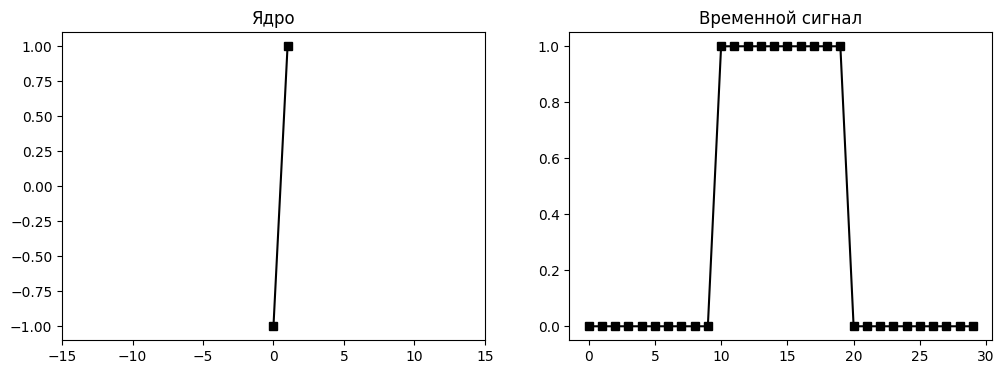

In [53]:
# Создадим ядро и начальный временной сигнал
ker = np.array([-1, 1])
signal = np.zeros(30)
signal[10:20] = 1

# Изобразим их
_, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(ker, "ks-")
axs[0].set_title("Ядро")
axs[0].set_xlim([-15, 15])

axs[1].plot(signal, "ks-")
axs[1].set_title("Временной сигнал")

plt.show()

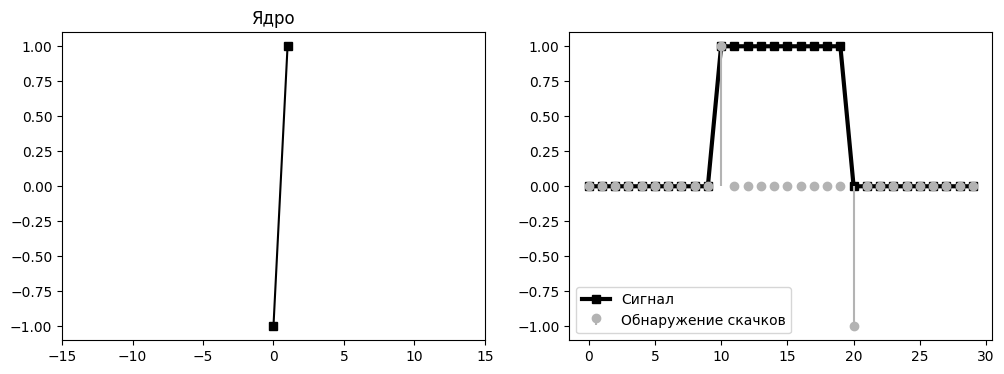

In [54]:
# Далее реализуем детектор резких изменений
# 
featureMap = np.zeros(len(signal))

# С помощью цикла реализуем применение ядра к сигналу (np.dot)
for i in range(1, len(signal)):
    featureMap[i] = np.dot(ker, signal[i-1:i+1])

# Изобразим график
_, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].plot(ker, "ks-")
axs[0].set_title("Ядро")
axs[0].set_xlim([-15, 15])

axs[1].plot(signal, "ks-", label="Сигнал", linewidth=3)
markerline, stemlines, baseline = axs[1].stem(range(len(signal)), featureMap, 
                                linefmt = "grey", basefmt=" ", markerfmt = "o", label="Обнаружение скачков")

plt.setp(stemlines, color=[.7, .7, .7])
plt.setp(markerline, color=[.7, .7, .7])
axs[1].legend()
plt.show()

### Упражнение 6. Низкочастотная фильтрация.

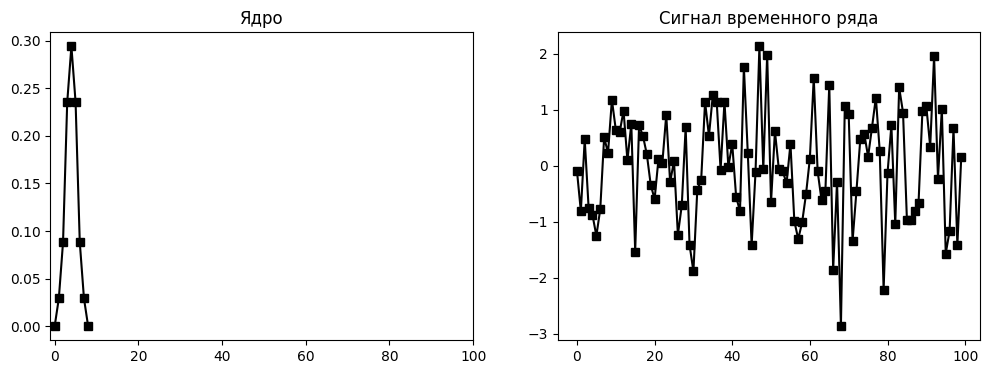

In [25]:
# Ядро (Гауссовское)
ker_unnorm = np.array([0, 0.1, 0.3, 0.8, 1, 0.8, 0.3, 0.1, 0])
kern = ker_unnorm / np.sum(ker_unnorm)

# Параметры длины ядра
lengthKer = len(kern)
halfKer = lengthKer // 2 + 1

# Сигнал
N = 100
sig = np.random.randn(N)

# Изобразим их 
_, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(kern, "ks-")
axs[0].set_xlim([-1, N])
axs[0].set_title("Ядро")

axs[1].plot(sig, "ks-")
axs[1].set_title("Сигнал временного ряда")

plt.show()

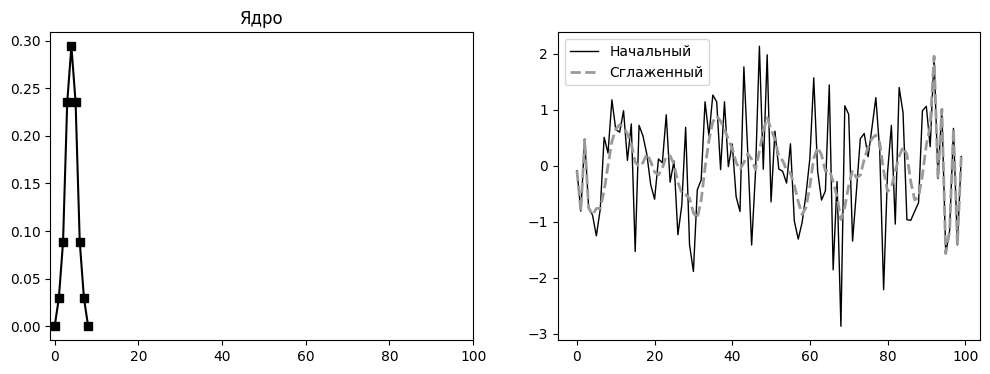

In [26]:
# Теперь построим отфильтрованный сигнал
filtSig = np.copy(sig)

# Пройдем ядром по сигналу
for i in range(halfKer, len(sig) - lengthKer + 1):
    filtSig[i] = np.dot(sig[i - halfKer : i + halfKer - 1], kern)

# Визуализируем полученный результат
_, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(kern, "ks-")
axs[0].set_title("Ядро")
axs[0].set_xlim([-1, N])

axs[1].plot(sig, "k", label="Начальный", linewidth=1)
axs[1].plot(filtSig, "--",color=[.6, .6, .6], label="Сглаженный", linewidth=2)
axs[1].legend()

plt.show()

### Упражнение 7. Высокочастотный фильтр

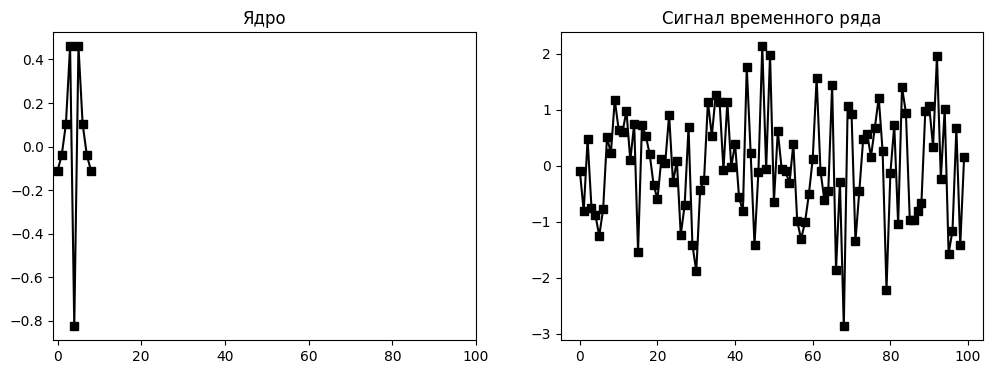

In [27]:
# Усовершенствуем ядро из упражнения
kern_2 = np.array([0, .1, .3, .8, -1, .8, .3, .1, 0])
kern_2 = kern_2 / np.sum(kern_2)
kern_2 -= np.mean(kern_2)

# Далее скопируем код из прошлого упражнения 
# Изобразим их 
_, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(kern_2, "ks-")
axs[0].set_xlim([-1, N])
axs[0].set_title("Ядро")

axs[1].plot(sig, "ks-")
axs[1].set_title("Сигнал временного ряда")

plt.show()

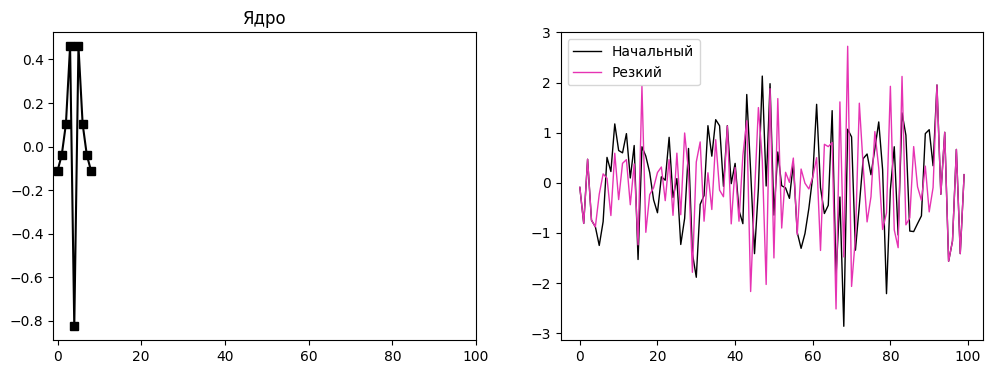

In [182]:
# Применим ядро к сигналу
# Теперь построим отфильтрованный сигнал
filtSig = np.copy(sig)

# Пройдем ядром по сигналу
for i in range(halfKer, len(sig) - lengthKer + 1):
    filtSig[i] = np.dot(sig[i - halfKer : i + halfKer - 1], kern_2)

# Визуализируем полученный результат
_, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(kern_2, "ks-")
axs[0].set_title("Ядро")
axs[0].set_xlim([-1, N])

axs[1].plot(sig, "k", label="Начальный", linewidth=1)
axs[1].plot(filtSig, "-",color=[.9, .2, .7], label="Резкий",linewidth=1)
axs[1].legend()

plt.show()

## Кластеризация методом $k$-средних.

### Упражнение 8. Проверить визуально похожи ли расположения центроидов при раных начальных точках.

In [26]:
# Делается выше в разеделе кластеризация методом k-средних

### Упражнение 9. Повторить кластеризацию используя $k=2$ и $k=4$.

In [73]:
# Напишу заново код для кластеризации при k=2 (можно поменять на k=4)
nPerClust = 50

A = [1, 1]
B = [-3, 1]
C = [3, 3]

blur = 1

a = np.array([A[0] + np.random.randn(nPerClust) * blur, A[1] + np.random.randn(nPerClust) * blur])
b = np.array([B[0] + np.random.randn(nPerClust) * blur, B[1] + np.random.randn(nPerClust) * blur])
c = np.array([C[0] + np.random.randn(nPerClust) * blur, C[1] + np.random.randn(nPerClust) * blur])

abc = np.concatenate([a, b, c], axis=1)
data = np.transpose(abc)

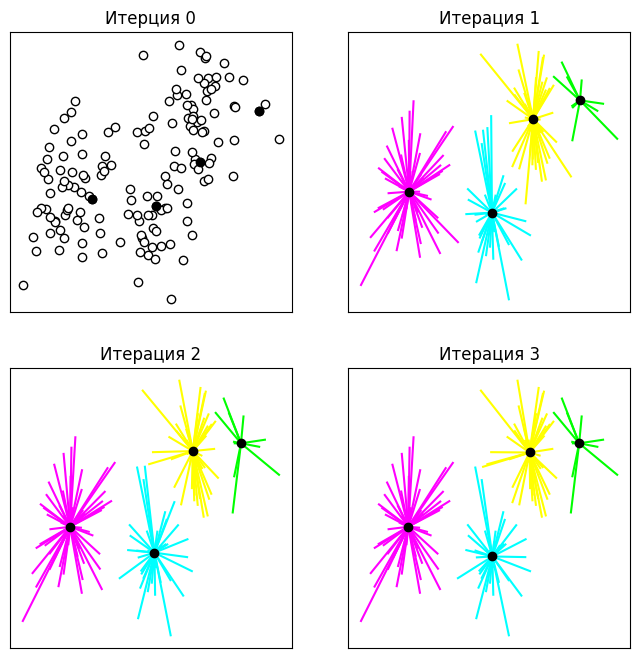

In [109]:
k = 4

groups = np.random.choice(len(data), k, replace=False)
centroids = data[groups, :]
dist = np.zeros([150, k])
color = [[1, 0, 1], [0, 1, 0], [0, 1, 1], [1, 1, 0]]

_, axs = plt.subplots(2, 2, figsize=(8, 8))
axs = axs.flatten()
axs[0].plot(data[:,0], data[:,1], "ko", markerfacecolor="w")
axs[0].plot(centroids[:, 0], centroids[:, 1], "ko")
axs[0].set_title("Итерция 0")
axs[0].set_xticks([])
axs[0].set_yticks([])

for iter in range(3):
    for ki in range(k):
        dist[:, ki] = np.sum((data - centroids[ki, :]) ** 2, axis=1)
    groupmin = np.argmin(dist, axis=1)

    for i in range(k):
        centroids[i, :] = np.array([np.mean(data[groupmin==i][:,0]),
                               np.mean(data[groupmin==i][:,1])])
    for i in range(len(data)):
        axs[iter + 1].plot([data[i, 0], centroids[groupmin[i], 0]], [data[i, 1], centroids[groupmin[i], 1]], color = color[groupmin[i]])
    axs[iter + 1]. plot(centroids[:, 0], centroids[:, 1], "ko")
    axs[iter + 1].set_title(f'Итерация {iter + 1}')
    axs[iter + 1].set_xticks([])
    axs[iter + 1].set_yticks([])